In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_set=pd.read_csv('urine.csv')

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [4]:
from tensorflow.keras.optimizers import Adam

In [5]:
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X=data_set.iloc[:,[0,1,2,3,4,5]].values
y=data_set.iloc[:,[6]].values

In [7]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [9]:
X.shape

(79, 6)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape

(63, 6)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train = X_train.reshape(63,6,1)
X_test = X_test.reshape(16,6,1)

In [13]:
#The NN Model
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape = (6,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape = (6,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 5, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)              

In [14]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose =1)

Train on 63 samples, validate on 16 samples
Epoch 1/50
63/63 [==============================] - 4s 69ms/sample - loss: 1.3035 - accuracy: 0.5079 - val_loss: 0.6980 - val_accuracy: 0.3750
Epoch 2/50
63/63 [==============================] - 0s 1ms/sample - loss: 1.1875 - accuracy: 0.4921 - val_loss: 0.6972 - val_accuracy: 0.3750
Epoch 3/50
63/63 [==============================] - 0s 1ms/sample - loss: 1.0519 - accuracy: 0.6032 - val_loss: 0.6970 - val_accuracy: 0.3750
Epoch 4/50
63/63 [==============================] - 0s 1ms/sample - loss: 1.1911 - accuracy: 0.4921 - val_loss: 0.6964 - val_accuracy: 0.4375
Epoch 5/50
63/63 [==============================] - 0s 984us/sample - loss: 1.1555 - accuracy: 0.4921 - val_loss: 0.6963 - val_accuracy: 0.4375
Epoch 6/50
63/63 [==============================] - 0s 841us/sample - loss: 1.0997 - accuracy: 0.5238 - val_loss: 0.6961 - val_accuracy: 0.4375
Epoch 7/50
63/63 [==============================] - 0s 1ms/sample - loss: 1.3744 - accuracy: 0.4921

In [15]:
#Learning Curve
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

In [16]:
history.history

{'loss': [1.3034549525805883,
  1.1874623336489238,
  1.0519129813663544,
  1.191095791165791,
  1.1554709691849967,
  1.0997388211507646,
  1.37441248931582,
  1.5022716654671564,
  1.3933892344671583,
  1.2591737376319037,
  1.1300447677809096,
  1.1832330075521318,
  1.319158332688468,
  1.03379187697456,
  1.1587810043304685,
  1.1630857094885811,
  1.126498615930951,
  1.2113142486602542,
  1.0516750528698875,
  1.1974417765935261,
  1.309721278765845,
  0.9311698448090326,
  0.8811252968651908,
  1.2645363315703377,
  0.9818302799784948,
  0.963423372261108,
  1.1239642463033162,
  1.1528772115707397,
  1.1726658722710988,
  1.1277832672709511,
  1.356214894188775,
  0.9524229348651947,
  1.0865023136138916,
  1.1155706700824557,
  0.8465929305742658,
  1.1900063317919534,
  1.0411025087038677,
  0.7982731262842814,
  0.8445268084132482,
  0.9577409180383833,
  1.1717267074282207,
  1.034946979038299,
  1.076723645603846,
  1.2469554685411,
  1.3274535035330153,
  0.8988130310225

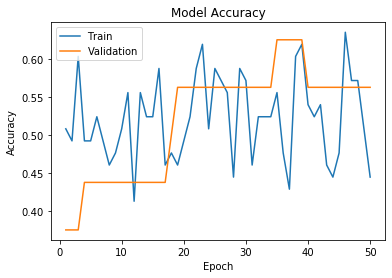

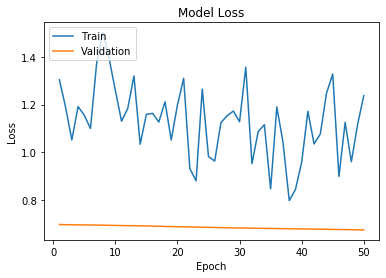

In [17]:
plot_learningCurve(history, epochs)